# Patricia Trujillo, Daniel Castro, Fernando Flores


1. Importa con la librería de pandas, como csv, los datos que vienen aquí:

https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv y llámalo train.set

https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv y llámalo test.set

In [3]:
import pandas as pd

path_data = "/Users/Patricia/Documents/Diplomado/python/tarea"
path_trn = path_data + "/train_dataset.csv"
path_tst = path_data + "/test_dataset.csv"

trn_data = pd.read_csv(path_trn) 
tst_data = pd.read_csv(path_tst)

2 . Revisa este sitio para que entiendas el reto.Busca la documentación que viene sobre el dataset para llenar la misma tabla que llenaste para R, en donde venga la descripción, el tipo de variable, los rangos.

In [292]:
#Función para obtener la información de la tabla

def info_table(df,tr_tst):
    lst_dict = []
    for x in df.columns:
        dict_row = {}
        dict_row['col_name'] = x
        data_type = trn_data[x].apply(type).iat[0]
        dict_row['data_type'] = data_type.__name__
        if str(dict_row['data_type']) == 'str':
            p_v = trn_data[x].unique().tolist()
            p_v_str = []
            for y in p_v:
                p_v_str.append(str(y))
            dict_row['p_vals']= ','.join(p_v_str)
        else:
            dict_row['p_vals'] = str(trn_data[x].min()) + '-' + str(trn_data[x].max())
        lst_dict.append(dict_row)

    df_type = pd.DataFrame(lst_dict)
    if tr_tst == 'train': 
        df_type['description']=["Unique Loan ID",
                                "Male/ Female",
                                "Applicant married (Y/N)",
                                "Number of dependents",
                                "Applicant Education (Graduate/ Under Graduate)",
                                "Self employed (Y/N)",
                                "Applicant income",
                                "Coapplicant income",
                                "Loan amount in thousands",
                                "Term of loan in months",
                                "credit history meets guidelines",
                                "Urban/ Semi Urban/ Rural",
                                "Loan approved (Y/N)"]
    else:
        df_type['description']=["Unique Loan ID",
                                "Male/ Female",
                                "Applicant married (Y/N)",
                                "Number of dependents",
                                "Applicant Education (Graduate/ Under Graduate)",
                                "Self employed (Y/N)",
                                "Applicant income",
                                "Coapplicant income",
                                "Loan amount in thousands",
                                "Term of loan in months",
                                "credit history meets guidelines",
                                "Urban/ Semi Urban/ Rural"]
        
    return(df_type)


Utilizamos la función creada para obtener la información de las dos tablas.

In [293]:
## train vars description
info_table(trn_data,'train')

,col_name,data_type,p_vals,description
0,Loan_ID,str,"LP001002,LP001003,LP001005,LP001006,LP001008,L...",Unique Loan ID
1,Gender,str,"Male,Female,nan",Male/ Female
2,Married,str,"No,Yes,nan",Applicant married (Y/N)
3,Dependents,str,"0,1,2,3+,nan",Number of dependents
4,Education,str,"Graduate,Not Graduate",Applicant Education (Graduate/ Under Graduate)
5,Self_Employed,str,"No,Yes,nan",Self employed (Y/N)
6,ApplicantIncome,int,150-81000,Applicant income
7,CoapplicantIncome,float,0.0-41667.0,Coapplicant income
8,LoanAmount,float,9.0-700.0,Loan amount in thousands
9,Loan_Amount_Term,float,12.0-480.0,Term of loan in months


In [294]:
## test vars description
info_table(tst_data,'test')

,col_name,data_type,p_vals,description
0,Loan_ID,str,"LP001002,LP001003,LP001005,LP001006,LP001008,L...",Unique Loan ID
1,Gender,str,"Male,Female,nan",Male/ Female
2,Married,str,"No,Yes,nan",Applicant married (Y/N)
3,Dependents,str,"0,1,2,3+,nan",Number of dependents
4,Education,str,"Graduate,Not Graduate",Applicant Education (Graduate/ Under Graduate)
5,Self_Employed,str,"No,Yes,nan",Self employed (Y/N)
6,ApplicantIncome,int,150-81000,Applicant income
7,CoapplicantIncome,float,0.0-41667.0,Coapplicant income
8,LoanAmount,float,9.0-700.0,Loan amount in thousands
9,Loan_Amount_Term,float,12.0-480.0,Term of loan in months


3 . ¿Cuántas observaciones se tienen en cada dataset? ¿Cuántas columnas (puedes usar dataframe.columns)? ¿Cuáles son los primeros 5 registros?



In [295]:
#Para trn_data

print("Número de observaciones en train: " + str(trn_data.Loan_ID.count()))
print("Número de columnas en train: " + str(len(trn_data.columns)))
print("Primeros 5 registros: ")
trn_data.head(5)

Número de observaciones en train: 614
Número de columnas en train: 13
Primeros 5 registros: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [296]:
#Para tst_data

print("Número de observaciones en test: " + str(tst_data.Loan_ID.count()))
print("Número de columnas en test: " + str(len(tst_data.columns)))
print("Primeros 5 registros: ")
tst_data.head(5)

Número de observaciones en test: 367
Número de columnas en test: 12
Primeros 5 registros: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


4 . Observa cuántos Nas tienes por columna y por fila (usa la función que vimos para hacerlo para todas las columnas/filas de una vez). Elimina las filas en donde haya valores nulos.

In [297]:
#Para trn_data | Na

print("Número de NA's por columna en train")
trn_data.isna().sum()

Número de NA's por columna en train


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [298]:
print("Número de NA's por fila en train")
trn_data.isna().sum(axis=1)

Número de NA's por fila en train


0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     2
20     0
21     0
22     0
23     1
24     2
25     0
26     0
27     0
28     0
29     1
      ..
584    0
585    0
586    0
587    0
588    1
589    0
590    0
591    0
592    1
593    0
594    0
595    0
596    0
597    1
598    0
599    0
600    2
601    1
602    0
603    0
604    0
605    1
606    0
607    0
608    0
609    0
610    0
611    0
612    0
613    0
Length: 614, dtype: int64

In [299]:
#Para tst_data | Na

print("Número de NA's por columna en test")
tst_data.isna().sum()

Número de NA's por columna en test


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [300]:
print("Número de NA's por fila en test")
tst_data.isna().sum(axis=1)

Número de NA's por fila en test


0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     1
12     1
13     1
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     1
27     0
28     1
29     0
      ..
337    0
338    0
339    0
340    0
341    0
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    0
350    0
351    1
352    0
353    0
354    0
355    0
356    0
357    0
358    1
359    0
360    1
361    0
362    0
363    0
364    1
365    0
366    0
Length: 367, dtype: int64

In [301]:
## Eliminar renglones con Nan's para train dataset

trn_data['na_sum'] = trn_data.isna().sum(axis=1)
print("Número de NA's previo total: " + str(trn_data.na_sum.sum()))
trn_data = trn_data[trn_data['na_sum'] == 0]
print("Número de NA's posterior total: " + str(trn_data.na_sum.sum()))

Número de NA's previo total: 149
Número de NA's posterior total: 0


In [302]:
## Eliminar renglones con Nan's para test dataset
tst_data['na_sum'] = tst_data.isna().sum(axis=1)
print("Número de NA's previo total: " + str(tst_data.na_sum.sum()))
tst_data = tst_data[tst_data['na_sum'] == 0]
print("Número de NA's posterior total: " + str(tst_data.na_sum.sum()))

Número de NA's previo total: 84
Número de NA's posterior total: 0


5 . Recodifica a 0-1 las variables categóricas que estén siendo tratadas como strings. Usa la función replace que vimos, con un diccionario para hacer esto.

In [303]:
## Train dataset
for x in trn_data.columns:
    dict_rep = {}
    vals = trn_data[x].unique().tolist()
    data_type = trn_data[x].apply(type).iat[0]
    if (len(vals) == 2) & (data_type.__name__ == 'str'):
        cont = 0
        for y in vals:
            dict_rep[str(y)] = cont
            cont += 1
        trn_data[x].replace(dict_rep,inplace = True)
        

In [304]:
trn_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,na_sum
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,0
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,0
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1,0


In [305]:
## Test dataset
for x in tst_data.columns:
    dict_rep = {}
    vals = tst_data[x].unique().tolist()
    data_type = tst_data[x].apply(type).iat[0]
    if (len(vals) == 2) & (data_type.__name__ == 'str'):
        cont = 0
        for y in vals:
            dict_rep[str(y)] = cont
            cont += 1
        tst_data[x].replace(dict_rep,inplace = True)

In [306]:
tst_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,na_sum
0,LP001015,0,0,0,0,0,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,0,0,1,0,0,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,0,0,2,0,0,5000,1800,208.0,360.0,1.0,Urban,0
4,LP001051,0,1,0,1,0,3276,0,78.0,360.0,1.0,Urban,0
5,LP001054,0,0,0,1,1,2165,3422,152.0,360.0,1.0,Urban,0


6 . Da un resumen de la media, la mediana, desviación estándar, mínimo, máximo de las variables. Adicionalmente usa df[col_name].value_counts() para saber cuántas observaciones se tienen para las variables categóricas.

In [307]:
## Numeric info - Tabla con medidas

trn_data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,na_sum
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0
mean,0.179167,0.352083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667,0.0
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287,0.0
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000,0.0


In [308]:
## Strings info
for x in trn_data.columns:
    data_type = trn_data[x].apply(type).iat[0]
    if (data_type.__name__ == "str") & (x != "Loan_ID"):
        print(trn_data[x].value_counts())
    

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


7 . Para las variables categóricas, usa una crosstab para saber si se les da más créditos a las mujeres que a los hombres. Usa otra crosstab para saber si el hecho de tener historial crediticio hace que sea más fácil que te aprueben un crédito. ¿Cuáles son tus conclusiones? BONUS: Investiga cómo poner porcentajes en estas tabla en vez de números.

In [309]:
## Crosstab créditos mujeres y hombres
pd.crosstab(trn_data.Gender, trn_data.Loan_Status)

Loan_Status,0,1
Gender,,
0,116,278
1,32,54


In [4]:
#BONUS
## Crosstab créditos mujeres y hombres en porcentajes respecto del total. 
    
pd.crosstab(trn_data.Gender, trn_data.Loan_Status, margins=True, normalize =True)
       

Loan_Status,N,Y,All
Gender,,,
Female,0.061564,0.124792,0.186356
Male,0.249584,0.564060,0.813644
All,0.311148,0.688852,1.000000


BONUS: Con el parámetro de "margins" obtenemos los totales de filas y columnas, este paso es extra y no es necesario para hacer los porcentajes, con el parametro  de "normalize" = True  se dividen todos los valores entre la suma total. Se puede hacer sobre columnas (columns) y filas (index).

In [7]:
# Porcentaje de Y y N respecto el género

pd.crosstab(trn_data.Gender, trn_data.Loan_Status, margins=True, normalize ='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252
All,0.311148,0.688852


Conclusión: Creamos una tabla de porcentajes por filas y podemos observar que a las mujeres se les aprobo un 66.9% de los créditos y a los hombres un 69.3%, los porcentajes son muy similares y en este ejemplo a las mujeres no se les aprobó mas que a los hombres, al contrario.

In [9]:
## Crosstab Historial crediticio vs aprobación

pd.crosstab(trn_data.Credit_History, trn_data.Loan_Status,  normalize='index')

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


Conclusión: 

- Claramente se observa que si no tienes historial crediticio será muy dificil que se apruebe tu crédito ya que hay un 92.1% de rechazados.
- Si se tiene historial crediticio, la probabilidad de que te den el crédito es del 0.8 mientras que de rechazo es de 0.2.

Así que si es mucho más fácil que se te apruebe tu crédito si tienes historial crediticio.


8 . Haz un histograma para el ingreso de la persona y otro para la cantidad prestada. ¿Qué observas?

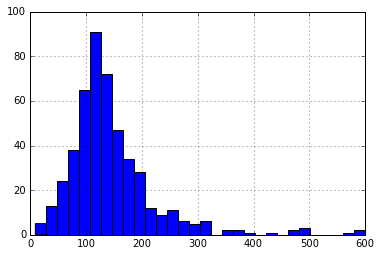

In [327]:
## Histograma para la cantidad prestada

%matplotlib inline
import matplotlib.pyplot as plt
trn_data.LoanAmount.hist(bins = 30)


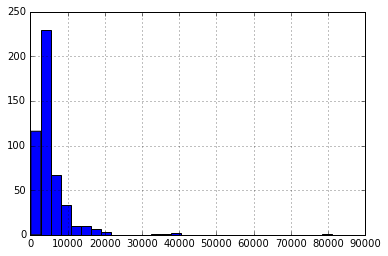

In [328]:
## Histograma para el ingreso persona

%matplotlib inline
import matplotlib.pyplot as plt
trn_data.ApplicantIncome.hist(bins = 30)



Observaciones:

- En el histograma de monto prestado: si bien, a pesar de lo outliers, los cuales son evidentemente las cantidades mas altas de prestamo, observamos que se comporta de una manera similar a la normal, esto puede ser consecuencia del modelo o la metodologia que se usa para otorgar los prestamos.

- Histograma del ingreso de la persona: Ahora bien, vemos que el ingreso de las personas que aplican para los prestamos no se comportan de un manera normal, ya que tenemos a la mayoria de nuestra población con un ingreso >= 5000.


9 . Haz un boxplot para la cantidad del préstamo según el historial crediticio de la persona. ¿Hay diferencias en la cantidad prestada dependiendo si tiene historial o no? Repite el mismo boxplot pero ahora según el sexo. ¿Hay diferencias?

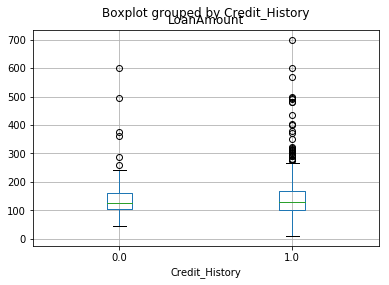

In [24]:
#Boxplot Cantidad de Prestamo vs Historial Crediticio

trn_data.boxplot(['LoanAmount'],by='Credit_History')



En la mayoria de la población hay diferencias mínimas pero cuando tiene historial crediticio hay mas atípicos.

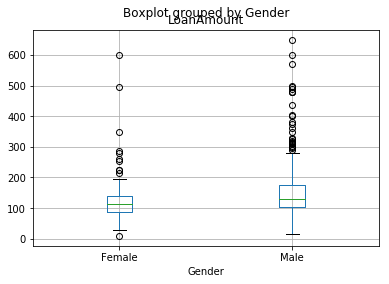

In [25]:
#Boxplot Cantidad de Prestamo vs género

trn_data.boxplot(['LoanAmount'],by='Gender')

Las distribuciones si cambian dependiendo el género, los hombres tienen montos mayores, las mujeres se concentran la mayoria en los 200k mientras que los hombres son aprox un 70%, es decir un 30% está fuera del rango de las mujeres.